In [1]:
from cmdstanpy import CmdStanModel
import pandas as pd
import arviz as az 
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

## Excercise 1 -  Generated Quantities Block

In [2]:
gen_quant = CmdStanModel(stan_file='code_1.stan')

In [3]:
F = len("Jakub")
L = len("Eliasz")
samples = gen_quant.sample(data={'M':F}, 
                            fixed_param=True, 
                            iter_sampling=1000, 
                            iter_warmup=0, 
                            chains = 1)

14:22:15 - cmdstanpy - INFO - CmdStan start processing


chain 1 |          | 00:00 Status

14:22:15 - cmdstanpy - INFO - CmdStan done processing.


In [4]:
df = samples.draws_pd()
df.head()

,lp__,accept_stat__,lambda,y_sim[1],y_sim[2],y_sim[3],y_sim[4],y_sim[5]
0,0.0,0.0,25.065,25.0,27.0,35.0,37.0,18.0
1,0.0,0.0,105.777,112.0,110.0,109.0,125.0,93.0
2,0.0,0.0,171.538,169.0,155.0,174.0,166.0,184.0
3,0.0,0.0,387.090,384.0,404.0,365.0,418.0,400.0
4,0.0,0.0,182.076,185.0,189.0,151.0,194.0,179.0


In [5]:
df.columns

Index(['lp__', 'accept_stat__', 'lambda', 'y_sim[1]', 'y_sim[2]', 'y_sim[3]',
       'y_sim[4]', 'y_sim[5]'],
      dtype='object')

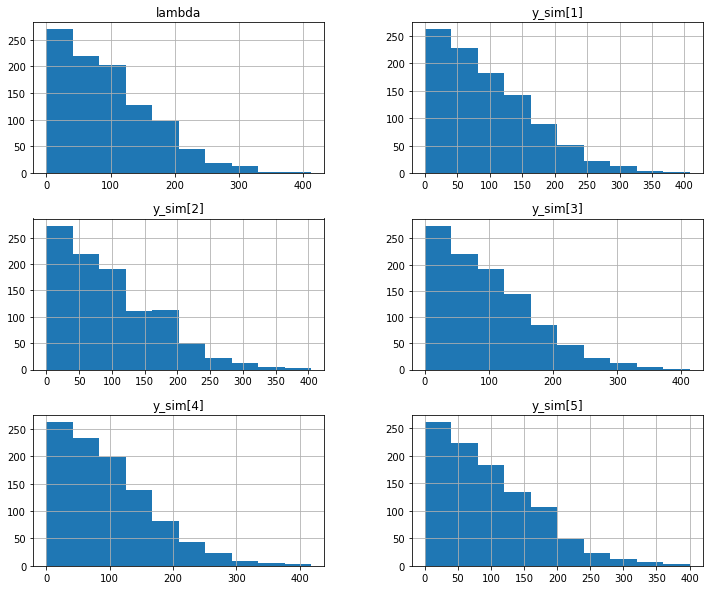

In [6]:
df.hist(column=['lambda', 'y_sim[1]', 'y_sim[2]', 'y_sim[3]', 'y_sim[4]', 'y_sim[5]'])
fig = plt.gcf()
fig.set_size_inches(12, 10)
plt.show()

## Excercise 2 - Constraints on the data 

In [7]:
bern1 = CmdStanModel(stan_file='code_2.stan')
samp_bern1 = bern1.sample(data={'N':2, 'y':[0,1]})

14:22:16 - cmdstanpy - INFO - CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

14:22:17 - cmdstanpy - INFO - CmdStan done processing.


In [8]:
bern2 = CmdStanModel(stan_file='code_3.stan')
samp_bern2 = bern2.sample(data={'N':2, 'y':[0,1]})

14:22:17 - cmdstanpy - INFO - CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

14:22:17 - cmdstanpy - INFO - CmdStan done processing.


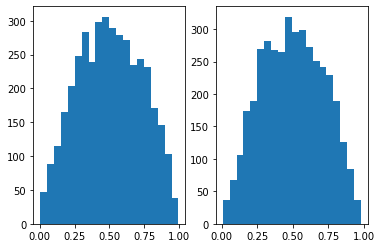

In [9]:
df_bern1 = samp_bern1.draws_pd()
df_bern2 = samp_bern2.draws_pd()
plt.subplot(1, 2, 1)
plt.hist(df_bern1['theta'], bins=20)
plt.title("")
plt.subplot(1, 2, 2)
plt.hist(df_bern2['theta'], bins=20)
plt.show()

## Excercise 3 - Constraints on parameters

### Unconstrained parameters

In [10]:
model_gm1 = CmdStanModel(stan_file='code_4.stan')
out_gamma1 = model_gm1.sample(output_dir='samples',iter_sampling=6000,iter_warmup=1000, seed=4838282)
out_gamma1.diagnose()


14:22:18 - cmdstanpy - INFO - CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

14:22:19 - cmdstanpy - INFO - CmdStan done processing.
14:22:19 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: gamma_lpdf: Random variable is -5.76714, but must be positive finite! (in 'C:/Users/Uzytkownik/Desktop/magisterka_sem1/data_analytics/Data-Analytics/lab2/code_4.stan', line 7, column 4 to column 30)
	Exception: gamma_lpdf: Random variable is -9.36381, but must be positive finite! (in 'C:/Users/Uzytkownik/Desktop/magisterka_sem1/data_analytics/Data-Analytics/lab2/code_4.stan', line 7, column 4 to column 30)
	Exception: gamma_lpdf: Random variable is -1.81419, but must be positive finite! (in 'C:/Users/Uzytkownik/Desktop/magisterka_sem1/data_analytics/Data-Analytics/lab2/code_4.stan', line 7, column 4 to column 30)
	Exception: gamma_lpdf: Random variable is -0.0693554, but must be positive finite! (in 'C:/Users/Uzytkownik/Desktop/magisterka_sem1/data_analytics/Data-Analytics/lab2/code_4.stan', line 7, column 4 to column 30)
	Exception: gamma_lpdf: Random var

14:22:19 - cmdstanpy - WARNING - Some chains may have failed to converge.
	Chain 1 had 2193 divergent transitions (36.5%)
	Chain 2 had 2089 divergent transitions (34.8%)
	Chain 3 had 2025 divergent transitions (33.8%)
	Chain 4 had 2331 divergent transitions (38.9%)
	Use function "diagnose()" to see further information.


"Processing csv files: C:\\Users\\Uzytkownik\\Desktop\\magisterka_sem1\\data_analytics\\Data-Analytics\\lab2\\samples\\code_4-20230321142218_1.csv, C:\\Users\\Uzytkownik\\Desktop\\magisterka_sem1\\data_analytics\\Data-Analytics\\lab2\\samples\\code_4-20230321142218_2.csv, C:\\Users\\Uzytkownik\\Desktop\\magisterka_sem1\\data_analytics\\Data-Analytics\\lab2\\samples\\code_4-20230321142218_3.csv, C:\\Users\\Uzytkownik\\Desktop\\magisterka_sem1\\data_analytics\\Data-Analytics\\lab2\\samples\\code_4-20230321142218_4.csv\n\nChecking sampler transitions treedepth.\nTreedepth satisfactory for all transitions.\n\nChecking sampler transitions for divergences.\n8638 of 24000 (35.99%) transitions ended with a divergence.\nThese divergent transitions indicate that HMC is not fully able to explore the posterior distribution.\nTry increasing adapt delta closer to 1.\nIf this doesn't remove all divergences, try to reparameterize the model.\n\nChecking E-BFMI - sampler transitions HMC potential energy

In [11]:
df_out = out_gamma1.draws_pd()
df_out.head()

,lp__,accept_stat__,stepsize__,treedepth__,n_leapfrog__,divergent__,energy__,theta
0,-1.039880,0.999946,0.403945,1.0,1.0,0.0,1.043850,0.782971
1,-0.779607,1.000000,0.403945,2.0,7.0,0.0,1.036580,0.474650
2,-0.745673,0.500000,0.403945,1.0,2.0,1.0,1.538240,0.072955
3,-0.884356,0.395482,0.403945,3.0,7.0,0.0,0.971978,0.607953
4,-1.250810,0.664096,0.403945,1.0,3.0,1.0,2.200670,1.000810


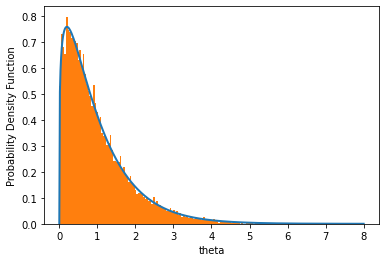

In [12]:
N=500
xs = np.linspace(0,8,N)
pdfs = stats.gamma.pdf(xs, 1.25, scale = 1 / 1.25) 

plt.plot(xs, pdfs, linewidth=2)

## add histogram of theta samples with 160 bins
plt.hist(df_out['theta'], bins=160, density=True)

plt.gca().set_xlabel("theta")
plt.gca().set_ylabel("Probability Density Function")
plt.show()


### Constrained parameter

In [13]:
model_gm2 = CmdStanModel(stan_file='code_5.stan')
out_gamma2 = model_gm2.sample(output_dir='samples',iter_sampling=6000,iter_warmup=1000, seed=4838282)
out_gamma2.diagnose()

14:22:21 - cmdstanpy - INFO - CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

14:22:21 - cmdstanpy - INFO - CmdStan done processing.


14:22:22 - cmdstanpy - WARNING - Some chains may have failed to converge.
	Chain 3 had 1 divergent transitions (0.0%)
	Use function "diagnose()" to see further information.


"Processing csv files: C:\\Users\\Uzytkownik\\Desktop\\magisterka_sem1\\data_analytics\\Data-Analytics\\lab2\\samples\\code_5-20230321142221_1.csv, C:\\Users\\Uzytkownik\\Desktop\\magisterka_sem1\\data_analytics\\Data-Analytics\\lab2\\samples\\code_5-20230321142221_2.csv, C:\\Users\\Uzytkownik\\Desktop\\magisterka_sem1\\data_analytics\\Data-Analytics\\lab2\\samples\\code_5-20230321142221_3.csv, C:\\Users\\Uzytkownik\\Desktop\\magisterka_sem1\\data_analytics\\Data-Analytics\\lab2\\samples\\code_5-20230321142221_4.csv\n\nChecking sampler transitions treedepth.\nTreedepth satisfactory for all transitions.\n\nChecking sampler transitions for divergences.\n1 of 24000 (0.00%) transitions ended with a divergence.\nThese divergent transitions indicate that HMC is not fully able to explore the posterior distribution.\nTry increasing adapt delta closer to 1.\nIf this doesn't remove all divergences, try to reparameterize the model.\n\nChecking E-BFMI - sampler transitions HMC potential energy.\nE

In [14]:
df_out2 = out_gamma2.draws_pd()
df_out2.head()

,lp__,accept_stat__,stepsize__,treedepth__,n_leapfrog__,divergent__,energy__,theta
0,-1.35054,0.998751,0.66205,1.0,1.0,0.0,1.35735,0.650658
1,-1.25102,0.980362,0.66205,3.0,7.0,0.0,1.64432,0.960134
2,-1.41443,0.964657,0.66205,1.0,3.0,0.0,1.55859,0.570761
3,-1.25769,0.985127,0.66205,1.0,3.0,0.0,1.65079,1.115080
4,-1.26322,0.941927,0.66205,2.0,3.0,0.0,2.03779,0.861507


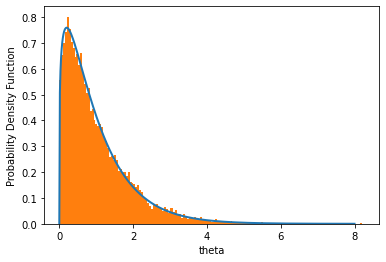

In [15]:
N=500
xs = np.linspace(0,8,N)
pdfs = stats.gamma.pdf(xs, 1.25, scale = 1 / 1.25) 

plt.plot(xs, pdfs, linewidth=2)

## add histogram of theta samples from the second model with 160 bins
plt.hist(df_out2['theta'], bins=160, density=True)

plt.gca().set_xlabel("theta")
plt.gca().set_ylabel("Probability Density Function")
plt.show()

## Excercise 4 -  Selection of parameters using equation solving



In [16]:
model_tune = CmdStanModel(stan_file='code_6.stan')

y0 = 0.1 # initial guess for the equation solving

data={'y_guess':[y0],
        'theta':[(F+L)/2]}
tunes = model_tune.sample(data=data, fixed_param=True, iter_sampling=1, iter_warmup=0, chains = 1)

14:22:23 - cmdstanpy - INFO - CmdStan start processing


chain 1 |          | 00:00 Status

14:22:23 - cmdstanpy - INFO - CmdStan done processing.


In [17]:
df_tunes = tunes.draws_pd()
df_tunes.head()

,lp__,accept_stat__,sigma
0,0.0,0.0,2.13523


## Excercise 5 - different methods of defining models


In [18]:
model_samp_st = CmdStanModel(stan_file='code_7.stan')
model_log_target = CmdStanModel(stan_file='code_8.stan')
model_log_target_ind = CmdStanModel(stan_file='code_9.stan')
data = {'N': F}
seed = 26062000#integer, your date of birth in the DDMMYYYY format without leading zero (or if you are GPRD weary, use any other date you wish)
result_1 = model_samp_st.sample(data=data,seed=seed)
result_2 = model_log_target.sample(data=data,seed=seed)
result_3 = model_log_target_ind.sample(data=data,seed=seed)



14:22:24 - cmdstanpy - INFO - CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

14:22:24 - cmdstanpy - INFO - CmdStan done processing.
14:22:24 - cmdstanpy - INFO - CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

14:22:25 - cmdstanpy - INFO - CmdStan done processing.
14:22:25 - cmdstanpy - INFO - CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

14:22:25 - cmdstanpy - INFO - CmdStan done processing.


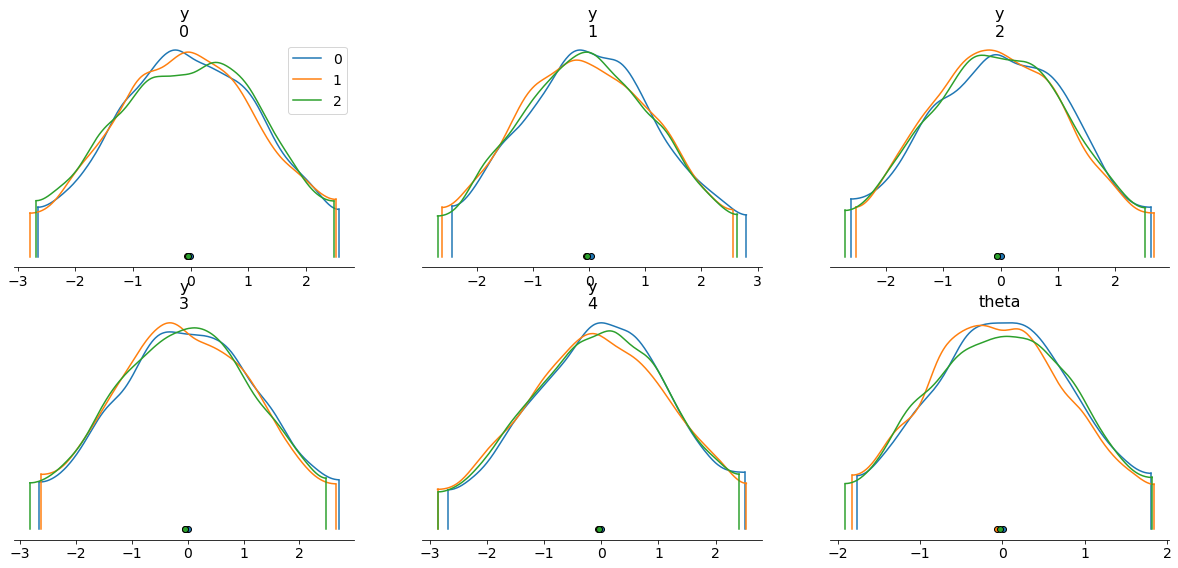

In [19]:
az.plot_density([result_1,result_2,result_3])
plt.show()

## Excercise 6 - generated quantities post sampling

14:22:26 - cmdstanpy - WARNING - Argument name `mcmc_sample` is deprecated, please rename to `previous_fit`.
14:22:26 - cmdstanpy - INFO - Chain [1] start processing
14:22:26 - cmdstanpy - INFO - Chain [2] start processing
14:22:26 - cmdstanpy - INFO - Chain [3] start processing
14:22:26 - cmdstanpy - INFO - Chain [4] start processing
14:22:26 - cmdstanpy - INFO - Chain [3] done processing
14:22:26 - cmdstanpy - INFO - Chain [1] done processing
14:22:26 - cmdstanpy - INFO - Chain [2] done processing
14:22:26 - cmdstanpy - INFO - Chain [4] done processing
14:22:26 - cmdstanpy - WARNING - Sample doesn't contain draws from warmup iterations, rerun sampler with "save_warmup=True".


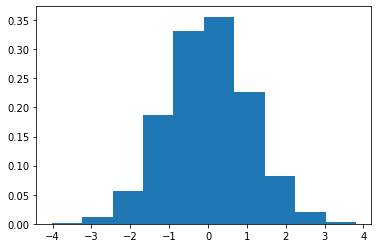

In [20]:
model_gq = CmdStanModel(stan_file='code_10.stan')
# fill in with chosen result from previous excercise
mean_of_y = model_gq.generate_quantities(data=data,
                                        mcmc_sample = result_1)
# investigate the output and plot histogram of mean_y variable
mean_y_df = mean_of_y.draws_pd()
plt.hist(mean_y_df['mean_y'], density=True)
plt.show()